In [9]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import pickle

In [10]:
SOUND_FOLDER = "./Audio_Dataset"
FEAT_FOLDER = "./Features"

## **Dataset analysis**

In [11]:
# Create Dataframe
df = pd.DataFrame(columns=['path', 'file_name', 'class'])
print(df)

Empty DataFrame
Columns: [path, file_name, class]
Index: []


In [12]:
path = os.path.join(SOUND_FOLDER)

In [13]:
# Retrieve list of files
for (root, dirs, file) in os.walk(path):
    for f in file:
      if '.wav' in f:
        path_complete = root+"/"+f
        db_new_row = {'path':path_complete}
        db_new_row['file_name'] = os.path.basename(path_complete).split('/')[-1]
        db_new_row['class'] = os.path.split(path_complete)[0].split("/")[-1]
        s = pd.Series(db_new_row)
        df = pd.concat([df, s.to_frame().T], ignore_index=True)
df

,path,file_name,class
0,./Audio_Dataset/kick/Bass Sample 40.wav,Bass Sample 40.wav,kick
1,./Audio_Dataset/kick/Bass Sample 8.wav,Bass Sample 8.wav,kick
2,./Audio_Dataset/kick/Bass Sample 23.wav,Bass Sample 23.wav,kick
3,./Audio_Dataset/kick/Bass Sample 37.wav,Bass Sample 37.wav,kick
4,./Audio_Dataset/kick/Bass Sample 36.wav,Bass Sample 36.wav,kick
...,...,...,...
155,./Audio_Dataset/toms/Tom Sample 10.wav,Tom Sample 10.wav,toms
156,./Audio_Dataset/toms/Tom Sample 12.wav,Tom Sample 12.wav,toms
157,./Audio_Dataset/toms/Tom Sample 5.wav,Tom Sample 5.wav,toms
158,./Audio_Dataset/toms/Tom Sample 4.wav,Tom Sample 4.wav,toms


In [14]:
print(df.loc[1,['path', 'file_name']])

path         ./Audio_Dataset/kick/Bass Sample 8.wav
file_name                         Bass Sample 8.wav
Name: 1, dtype: object


In [15]:
# Count occurrences in classes
df_classes = pd.DataFrame(columns=['class','num'])
count = df['class'].value_counts(dropna=False)
classes = count.index.values
values = count.values

df_classes['class'] = classes
df_classes['num'] = count.values

print(df_classes)



       class  num
0       kick   40
1      snare   40
2  overheads   40
3       toms   40


/var/folders/gk/fht8lvsx7yj3ch95mbx5tdwm0000gn/T/ipykernel_6241/2840464404.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'kick'),
 Text(1, 0, 'snare'),
 Text(2, 0, 'overheads'),
 Text(3, 0, 'toms')]

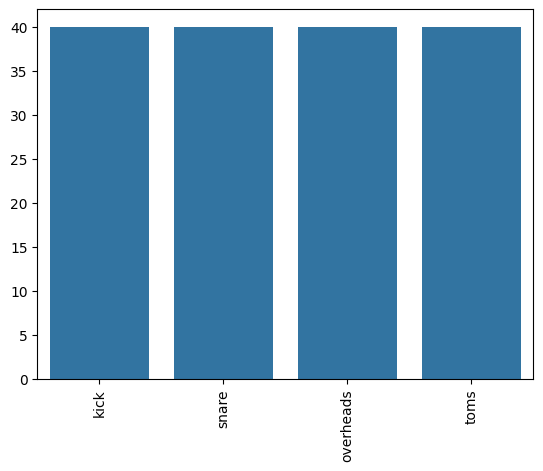

In [17]:
plot = sns.barplot(x=classes, y=values)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

## **Save Label file**

In [16]:
path = os.path.join(SOUND_FOLDER)
print("save labels in ")

if os.path.isdir(path):
    # exists
    print("found")
else:
    # doesn’t exist
    print(path + " Not found")
    os.mkdir(path)
    print(path + " Created")


print("save labels to -> "+path + "label.csv")
path_to_save = os.path.join(path, "label.csv")
df.to_csv(path_or_buf=path_to_save, index=False)


save labels in 
found
save labels to -> ./Audio_Datasetlabel.csv
